In [7]:
import os

os.environ['SPARK_VERSION'] = '3.3'

from pyspark.sql import SparkSession, Row
import pydeequ
from pyspark.sql import SparkSession
from pydeequ.checks import *
from pydeequ.verification import *
import time
import matplotlib.pyplot as plt
from pydeequ.analyzers import *

# Now, you can proceed with your SparkSession setup and the rest of your code
spark = (SparkSession
    .builder
    .config("spark.jars.packages", pydeequ.deequ_maven_coord)
    .config("spark.jars.excludes", pydeequ.f2j_maven_coord)
    .config("spark.scheduler.maxRegisteredResourcesWaitingTime", "5000")
    .config("spark.scheduler.minRegisteredResourcesRatio", "1.0")
    .config("spark.sql.debug.maxToStringFields", "100")
    .appName("entropy and uniqueness") \
    .getOrCreate())

df = spark.read.csv("chicago_taxi_trips_2016_01.csv", header=True, inferSchema=True)


In [8]:
import os

# Replace this with the path to your file
file_path = 'chicago_taxi_trips_2016_01.csv'

# Getting the size of the file
file_size = os.path.getsize(file_path)

print(f"The size of the file is: {file_size} bytes")

The size of the file is: 184423109 bytes


In [9]:
affichage = []
for i in range(1,6):
    affichage.append(round(file_size * 0.2 * i))
print(affichage)

[36884622, 73769244, 110653865, 147538487, 184423109]


# Entropy and Uniqueness for 4 columns

## Taxi_id

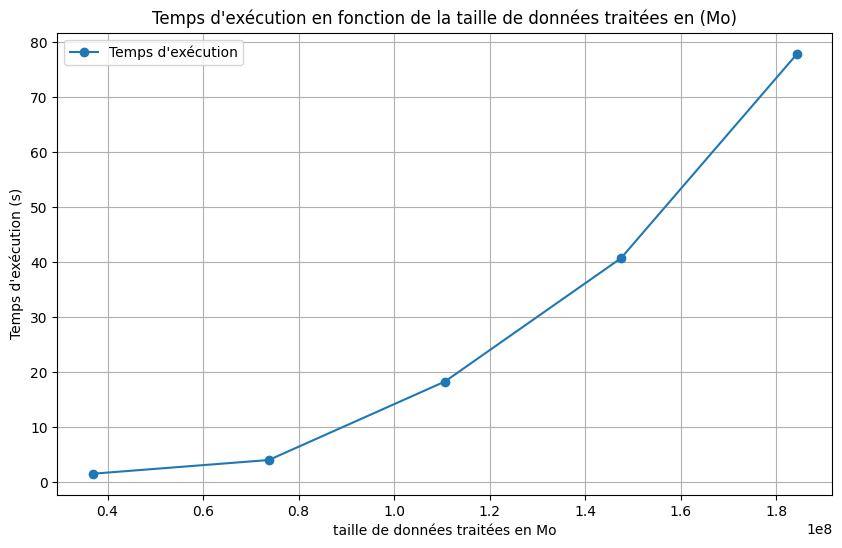

In [10]:
# Charger les données dans un DataFrame Spark
data = df.cache()

# Calculer une fois le nombre total de lignes
total_count = data.count()

# Initialiser les listes pour stocker les résultats
times_batch_ti = []
Uniqueness_results = []

# Au lieu d'initialiser avec une liste vide, utilisez les données existantes et limitez à 0
accumulated_data = data.limit(0)

for i in range(1, 6):
    # Sélectionner le sous-ensemble de données à ajouter
    subset_size = int(total_count * 0.2 * i)
    new_data = data.limit(subset_size).subtract(accumulated_data).cache()
    new_data.count()  # Force le cache et l'évaluation

    # Accumuler les données
    accumulated_data = accumulated_data.union(new_data).cache()

    # Définir la vérification de la complétude
    check = Check(spark, CheckLevel.Warning, "Data Uniqueness Check")
    Uniqueness_check = check.isUnique("taxi_id")  # Remplacer par le nom réel de votre colonne

    # Démarrer le chronomètre
    start_time = time.time()
    
    analysisResult = AnalysisRunner(spark) \
            .onData(accumulated_data) \
            .addAnalyzer(Entropy("taxi_id"))

    # Exécuter la vérification
    verification_result = VerificationSuite(spark) \
        .onData(accumulated_data) \
        .addCheck(Uniqueness_check) \
        .run()
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_batch_ti.append(elapsed_time)  # Ajouter le temps d'exécution à la liste 'times'

    # Détails sur les résultats
    check_results = verification_result.checkResults
    if check_results and isinstance(check_results, list):
        for result in check_results:
            # Ensure the result is for a completeness check
            if 'UniquenessConstraint' in result['constraint']:
                Uniqueness_status = result['constraint_status']  # 'Success' or 'Failure'
                Uniqueness_message = result['constraint_message']
                
                # Extract the completeness value from the message
                # This assumes the message contains the value in the format "Value: [completeness_value] does not meet..."
                Uniqueness_value = float(Uniqueness_message.split('Value: ')[1].split(' ')[0])
                
                Uniqueness_results.append(Uniqueness_value)

    # Libérer la mémoire
    new_data.unpersist()
    accumulated_data.unpersist()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(affichage, times_batch_ti, marker='o', label='Temps d\'exécution')
plt.xlabel('taille de données traitées en Mo')
plt.ylabel('Temps d\'exécution (s)')
plt.title('Temps d\'exécution en fonction de la taille de données traitées en (Mo)')
plt.legend()
plt.grid(True)
plt.show()

## pickup_community_area

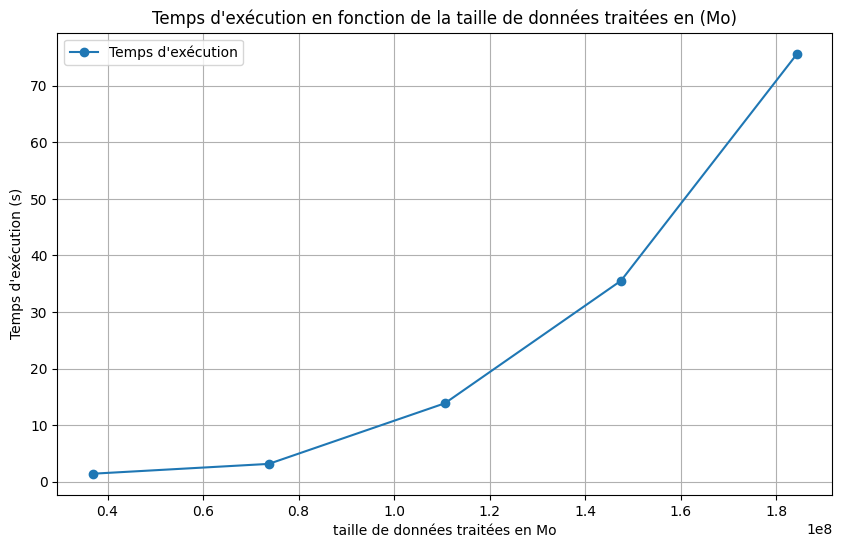

In [11]:
# Charger les données dans un DataFrame Spark
data = df.cache()

# Calculer une fois le nombre total de lignes
total_count = data.count()

# Initialiser les listes pour stocker les résultats
times_batch_pca = []
Uniqueness_results = []

# Au lieu d'initialiser avec une liste vide, utilisez les données existantes et limitez à 0
accumulated_data = data.limit(0)

for i in range(1, 6):
    # Sélectionner le sous-ensemble de données à ajouter
    subset_size = int(total_count * 0.2 * i)
    new_data = data.limit(subset_size).subtract(accumulated_data).cache()
    new_data.count()  # Force le cache et l'évaluation

    # Accumuler les données
    accumulated_data = accumulated_data.union(new_data).cache()

    # Définir la vérification de la complétude
    check = Check(spark, CheckLevel.Warning, "Data Uniqueness Check")
    Uniqueness_check = check.isUnique("pickup_community_area")  # Remplacer par le nom réel de votre colonne

    # Démarrer le chronomètre
    start_time = time.time()
    
    analysisResult = AnalysisRunner(spark) \
            .onData(accumulated_data) \
            .addAnalyzer(Entropy("pickup_community_area"))

    # Exécuter la vérification
    verification_result = VerificationSuite(spark) \
        .onData(accumulated_data) \
        .addCheck(Uniqueness_check) \
        .run()
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_batch_pca.append(elapsed_time)  # Ajouter le temps d'exécution à la liste 'times'

    # Détails sur les résultats
    check_results = verification_result.checkResults
    if check_results and isinstance(check_results, list):
        for result in check_results:
            # Ensure the result is for a completeness check
            if 'UniquenessConstraint' in result['constraint']:
                Uniqueness_status = result['constraint_status']  # 'Success' or 'Failure'
                Uniqueness_message = result['constraint_message']
                
                # Extract the completeness value from the message
                # This assumes the message contains the value in the format "Value: [completeness_value] does not meet..."
                Uniqueness_value = float(Uniqueness_message.split('Value: ')[1].split(' ')[0])
                
                Uniqueness_results.append(Uniqueness_value)

    # Libérer la mémoire
    new_data.unpersist()
    accumulated_data.unpersist()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(affichage, times_batch_pca, marker='o', label='Temps d\'exécution')
plt.xlabel('taille de données traitées en Mo')
plt.ylabel('Temps d\'exécution (s)')
plt.title('Temps d\'exécution en fonction de la taille de données traitées en (Mo)')
plt.legend()
plt.grid(True)
plt.show()

## dropoff_community_area

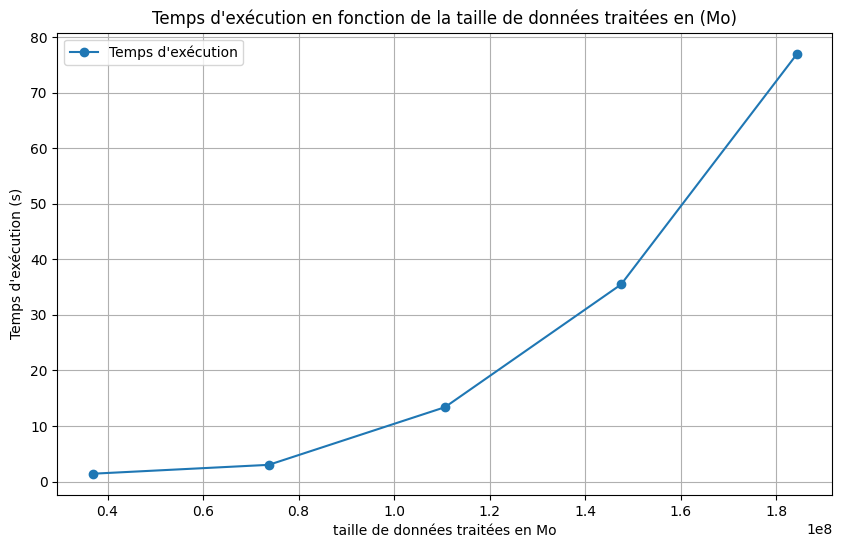

In [12]:
# Charger les données dans un DataFrame Spark
data = df.cache()

# Calculer une fois le nombre total de lignes
total_count = data.count()

# Initialiser les listes pour stocker les résultats
times_batch_dca = []
Uniqueness_results = []

# Au lieu d'initialiser avec une liste vide, utilisez les données existantes et limitez à 0
accumulated_data = data.limit(0)

for i in range(1, 6):
    # Sélectionner le sous-ensemble de données à ajouter
    subset_size = int(total_count * 0.2 * i)
    new_data = data.limit(subset_size).subtract(accumulated_data).cache()
    new_data.count()  # Force le cache et l'évaluation

    # Accumuler les données
    accumulated_data = accumulated_data.union(new_data).cache()

    # Définir la vérification de la complétude
    check = Check(spark, CheckLevel.Warning, "Data Uniqueness Check")
    Uniqueness_check = check.isUnique("dropoff_community_area")  # Remplacer par le nom réel de votre colonne

    # Démarrer le chronomètre
    start_time = time.time()
    
    analysisResult = AnalysisRunner(spark) \
            .onData(accumulated_data) \
            .addAnalyzer(Entropy("dropoff_community_area"))

    # Exécuter la vérification
    verification_result = VerificationSuite(spark) \
        .onData(accumulated_data) \
        .addCheck(Uniqueness_check) \
        .run()
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_batch_dca.append(elapsed_time)  # Ajouter le temps d'exécution à la liste 'times'

    # Détails sur les résultats
    check_results = verification_result.checkResults
    if check_results and isinstance(check_results, list):
        for result in check_results:
            # Ensure the result is for a completeness check
            if 'UniquenessConstraint' in result['constraint']:
                Uniqueness_status = result['constraint_status']  # 'Success' or 'Failure'
                Uniqueness_message = result['constraint_message']
                
                # Extract the completeness value from the message
                # This assumes the message contains the value in the format "Value: [completeness_value] does not meet..."
                Uniqueness_value = float(Uniqueness_message.split('Value: ')[1].split(' ')[0])
                
                Uniqueness_results.append(Uniqueness_value)

    # Libérer la mémoire
    new_data.unpersist()
    accumulated_data.unpersist()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(affichage, times_batch_dca, marker='o', label='Temps d\'exécution')
plt.xlabel('taille de données traitées en Mo')
plt.ylabel('Temps d\'exécution (s)')
plt.title('Temps d\'exécution en fonction de la taille de données traitées en (Mo)')
plt.legend()
plt.grid(True)
plt.show()

## dropoff_census_tract

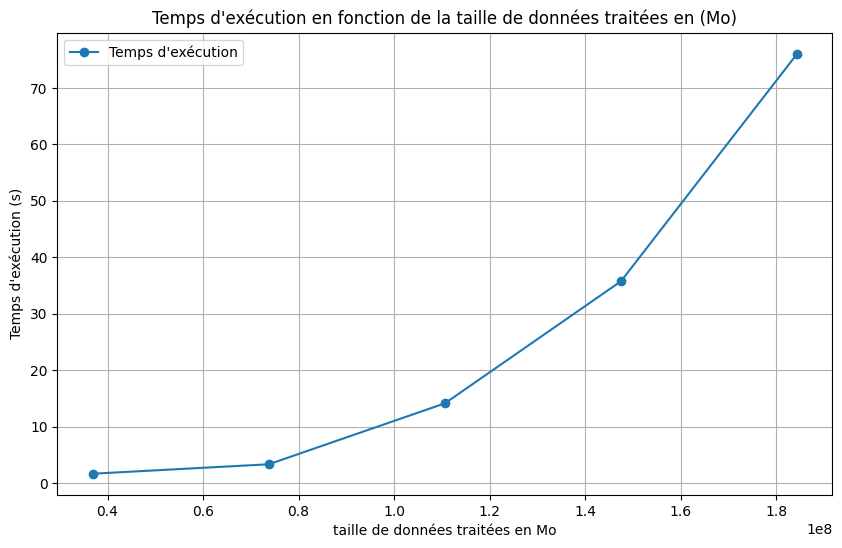

In [13]:
# Charger les données dans un DataFrame Spark
data = df.cache()

# Calculer une fois le nombre total de lignes
total_count = data.count()

# Initialiser les listes pour stocker les résultats
times_batch_dct = []
Uniqueness_results = []

# Au lieu d'initialiser avec une liste vide, utilisez les données existantes et limitez à 0
accumulated_data = data.limit(0)

for i in range(1, 6):
    # Sélectionner le sous-ensemble de données à ajouter
    subset_size = int(total_count * 0.2 * i)
    new_data = data.limit(subset_size).subtract(accumulated_data).cache()
    new_data.count()  # Force le cache et l'évaluation

    # Accumuler les données
    accumulated_data = accumulated_data.union(new_data).cache()

    # Définir la vérification de la complétude
    check = Check(spark, CheckLevel.Warning, "Data Uniqueness Check")
    Uniqueness_check = check.isUnique("dropoff_census_tract")  # Remplacer par le nom réel de votre colonne

    # Démarrer le chronomètre
    start_time = time.time()
    
    analysisResult = AnalysisRunner(spark) \
            .onData(accumulated_data) \
            .addAnalyzer(Entropy("dropoff_census_tract"))

    # Exécuter la vérification
    verification_result = VerificationSuite(spark) \
        .onData(accumulated_data) \
        .addCheck(Uniqueness_check) \
        .run()
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_batch_dct.append(elapsed_time)  # Ajouter le temps d'exécution à la liste 'times'

    # Détails sur les résultats
    check_results = verification_result.checkResults
    if check_results and isinstance(check_results, list):
        for result in check_results:
            # Ensure the result is for a completeness check
            if 'UniquenessConstraint' in result['constraint']:
                Uniqueness_status = result['constraint_status']  # 'Success' or 'Failure'
                Uniqueness_message = result['constraint_message']
                
                # Extract the completeness value from the message
                # This assumes the message contains the value in the format "Value: [completeness_value] does not meet..."
                Uniqueness_value = float(Uniqueness_message.split('Value: ')[1].split(' ')[0])
                
                Uniqueness_results.append(Uniqueness_value)

    # Libérer la mémoire
    new_data.unpersist()
    accumulated_data.unpersist()

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(affichage, times_batch_dct, marker='o', label='Temps d\'exécution')
plt.xlabel('taille de données traitées en Mo')
plt.ylabel('Temps d\'exécution (s)')
plt.title('Temps d\'exécution en fonction de la taille de données traitées en (Mo)')
plt.legend()
plt.grid(True)
plt.show()

## Affichage des resultats

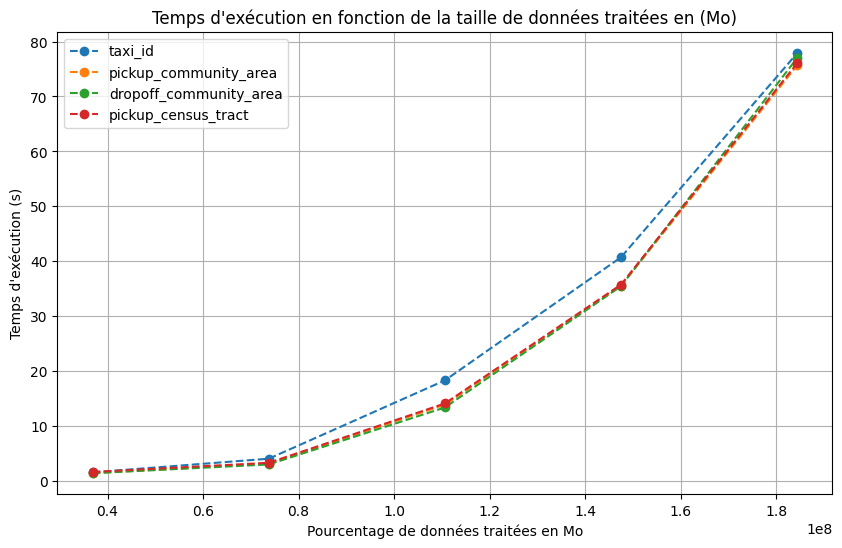

In [15]:
# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(affichage, times_batch_ti,'--', marker='o',label = "taxi_id")
plt.plot(affichage, times_batch_pca,'--', marker='o',label = "pickup_community_area")
plt.plot(affichage, times_batch_dca,'--', marker='o',label = "dropoff_community_area")
plt.plot(affichage, times_batch_dct,'--', marker='o',label = "pickup_census_tract")
plt.xlabel('Pourcentage de données traitées en Mo')
plt.ylabel('Temps d\'exécution (s)')
plt.title('Temps d\'exécution en fonction de la taille de données traitées en (Mo)')
plt.legend()
plt.grid(True)
plt.show()